In [9]:
pip install tensorflow

     |████████████████████████████████| 244.3 MB 32 kB/s  eta 0:00:012   |██▌                             | 19.4 MB 2.0 MB/s eta 0:01:52     |███                             | 22.3 MB 2.7 MB/s eta 0:01:23     |███                             | 23.5 MB 2.7 MB/s eta 0:01:22     |██████████▊                     | 81.5 MB 2.0 MB/s eta 0:01:22     |████████████▌                   | 95.2 MB 10.1 MB/s eta 0:00:15     |█████████████▍                  | 101.9 MB 5.4 MB/s eta 0:00:27     |██████████████▌                 | 110.6 MB 8.1 MB/s eta 0:00:17     |███████████████████▍            | 148.3 MB 5.9 MB/s eta 0:00:17     |███████████████████████████▉    | 212.7 MB 4.0 MB/s eta 0:00:08     |████████████████████████████    | 213.0 MB 4.0 MB/s eta 0:00:08
     |████████████████████████████████| 126 kB 715 kB/s eta 0:00:01
  Using cached flatbuffers-23.1.4-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
     |████████████████████████████████| 6.0 MB 3.7 MB/s e

In [10]:

import tensorflow as tf

In [11]:
mnist = tf.keras.datasets.mnist #28x28 images of handwritten digits.


In [12]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

model.fit(x_train,y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2655 - accuracy: 0.9211
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1073 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0721 - accuracy: 0.9773


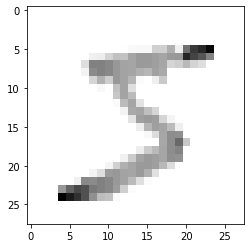

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()
print(x_train[0])


In [15]:
valLoss , valAcc = model.evaluate(x_test,y_test)
print(valLoss , valAcc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9731
0.09075341373682022 0.9731000065803528


In [16]:
model.save('HDmodel.model')

INFO:tensorflow:Assets written to: HDmodel.model/assets


INFO:tensorflow:Assets written to: HDmodel.model/assets


In [17]:
newModel = tf.keras.models.load_model('HDmodel.model')

In [18]:
predictions = newModel.predict([x_test])

313/313 [==============================] - 1s 1ms/step


In [23]:
print(predictions)

[[5.3620623e-09 1.7654698e-06 6.8878559e-05 ... 9.9771142e-01
  4.5054159e-07 6.1844848e-06]
 [4.6542605e-09 8.6345931e-04 9.9909365e-01 ... 1.9293904e-09
  4.1907010e-06 1.9770874e-11]
 [3.1820989e-06 9.9901617e-01 3.9390645e-05 ... 1.3391739e-04
  5.5075390e-04 1.5218154e-05]
 ...
 [6.2351924e-10 6.2000488e-08 9.4626209e-08 ... 3.8447006e-06
  8.9590009e-07 3.7908292e-05]
 [4.4441717e-07 7.0984760e-07 1.8290369e-07 ... 8.9300738e-07
  6.4857173e-05 3.0455103e-09]
 [2.2993667e-05 1.8562672e-06 1.4015624e-06 ... 1.5763260e-09
  3.2961716e-06 1.3540050e-07]]


In [29]:
import numpy as np
print(np.argmax(predictions[9]))

9


<function matplotlib.pyplot.show(close=None, block=None)>

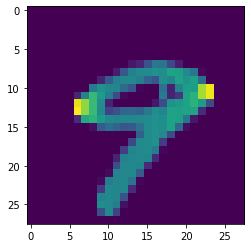

In [30]:
plt.imshow(x_test[9])
plt.show